In [1]:
## Done By: Nayan Man Singh Pradhan

In [1]:
## Importing
import numpy as np 
import matplotlib.pyplot as plt

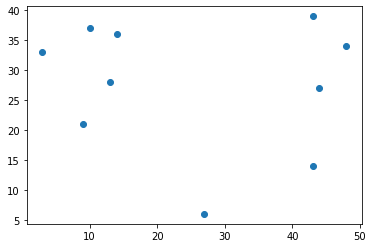

In [29]:
n = 10 ## number of random points
x = np.random.randint(0, 50, n) ## generates n random integers between 0 and 50
# print(x) ## test
y = np.random.randint(0, 50, n) ## generates n ranodm integers between 0 and 50
# print(y) ## test
coordinates = tuple(zip(x,y))
# print(coordinates) ##test
plt.scatter(x, y)
plt.show()